#Import required libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

#Loding data

In [2]:
from google.colab import files
uploaded=files.upload()
Books=pd.read_excel("Books.xlsx")
Ratings=pd.read_excel("Ratings.xlsx")
Users=pd.read_excel("Users.xlsx")

Saving Books.xlsx to Books.xlsx
Saving Ratings.xlsx to Ratings.xlsx
Saving Users.xlsx to Users.xlsx


#Exploratory Data Analysis

In [3]:
#Data information
print(Books.info())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271356 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [4]:
print(Ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1048575 non-null  int64  
 1   ISBN         1048574 non-null  object 
 2   Book-Rating  1048568 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 24.0+ MB
None


In [5]:
print(Users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278785 entries, 0 to 278784
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   User-ID     278785 non-null  int64 
 1   Location    278783 non-null  object
 2   Age         168070 non-null  object
 3   Unnamed: 3  108 non-null     object
 4   Unnamed: 4  64 non-null      object
 5   Unnamed: 5  2 non-null       object
dtypes: int64(1), object(5)
memory usage: 12.8+ MB
None


In [6]:
#Descriptive Statistics
print(Books.describe(include='all'))

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271356           271358               271360   
unique      271360          242130           102022                  118   
top     020130998X  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                17627   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16806                                             271044   
top     Harlequin  http://images.amazon.com/images/P/042509474X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/042509474X.0...   
freq          

In [7]:
print(Ratings.describe(include='all'))

             User-ID         ISBN   Book-Rating
count   1.048575e+06    1048574.0  1.048568e+06
unique           NaN     322931.0           NaN
top              NaN  971880107.0           NaN
freq             NaN       2264.0           NaN
mean    1.285089e+05          NaN  2.879888e+00
std     7.421876e+04          NaN  3.857869e+00
min     2.000000e+00          NaN  0.000000e+00
25%     6.339400e+04          NaN  0.000000e+00
50%     1.288350e+05          NaN  0.000000e+00
75%     1.927790e+05          NaN  7.000000e+00
max     2.788540e+05          NaN  1.000000e+01


In [8]:
print(Users.describe(include='all'))





              User-ID                         Location       Age Unnamed: 3  \
count   278785.000000                           278783  168070.0        108   
unique            NaN                            57302     218.0         39   
top               NaN  london, england, united kingdom      24.0       usa"   
freq              NaN                             2505    5680.0         18   
mean    139431.995240                              NaN       NaN        NaN   
std      80499.675975                              NaN       NaN        NaN   
min          1.000000                              NaN       NaN        NaN   
25%      69718.000000                              NaN       NaN        NaN   
50%     139431.000000                              NaN       NaN        NaN   
75%     209147.000000                              NaN       NaN        NaN   
max     278858.000000                              NaN       NaN        NaN   

        Unnamed: 4 Unnamed: 5  
count         64.0 

In [9]:


Books.shape

(271360, 8)

In [10]:
Users.shape

(278785, 6)

In [11]:
Ratings.shape

(1048575, 3)

In [12]:


Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [13]:
#Dropping columns
if any(col in Books.columns for col in ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']):
    Books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
else:
    print("Columns 'Image-URL-S', 'Image-URL-M', 'Image-URL-L' not found in DataFrame.")
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [14]:
#Check for null values
print(Books.isnull().sum())

ISBN                   0
Book-Title             4
Book-Author            2
Year-Of-Publication    0
Publisher              2
dtype: int64


In [15]:
# Handle null values in 'Book-Title' values with Unknown
Books['Book-Title'].fillna("Unknown", inplace=True)

#Fill missing 'Publisher' values with 'Unknown'
Books['Publisher'].fillna('Unknown', inplace=True)

#Fill missing 'Book-Author' values with 'Unknown Author'
Books['Book-Author'].fillna('Unknown Author', inplace=True)

#Drop rows where 'Year-Of-Publication' is null
Books['Year-Of-Publication'] = pd.to_numeric(Books['Year-Of-Publication'], errors='coerce')

#Convert to numerical values
Books['Year-Of-Publication'] = Books['Year-Of-Publication'].fillna(Books['Year-Of-Publication'].mean()).astype(int)


print(Books.isnull().sum())

<ipython-input-15-7772486000e7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Books['Book-Title'].fillna("Unknown", inplace=True)
<ipython-input-15-7772486000e7>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64


In [16]:
Books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

In [17]:
#Check for duplicates
print(Books.duplicated().sum())

0


In [18]:
Users.head()

,User-ID,Location,Age,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1,"nyc, new york, usa",NaN,NaN,NaN,NaN
1,2,"stockton, california, usa",18,NaN,NaN,NaN
2,3,"moscow, yukon territory, russia",NaN,NaN,NaN,NaN
3,4,"porto, v.n.gaia, portugal",17,NaN,NaN,NaN
4,5,"farnborough, hants, united kingdom",NaN,NaN,NaN,NaN


In [19]:
print(Users.isnull().sum())

User-ID            0
Location           2
Age           110715
Unnamed: 3    278677
Unnamed: 4    278721
Unnamed: 5    278783
dtype: int64


In [20]:
# Handle null values in 'Location' values with Unknown
Users['Location'].fillna("Unknown", inplace=True)
print(Users.isnull().sum())

User-ID            0
Location           0
Age           110715
Unnamed: 3    278677
Unnamed: 4    278721
Unnamed: 5    278783
dtype: int64


<ipython-input-20-eefb90fcbeb4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Users['Location'].fillna("Unknown", inplace=True)


In [21]:
#Dropping columns
if any(col in Users.columns for col in ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']):
    Users.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5'], axis=1, inplace=True)
else:
    print("Columns 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5' not found in DataFrame.")
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",NaN


In [22]:
#Fill missing ages with the median age and Converted 'Age' column to numeric
Users['Age'] = pd.to_numeric(Users['Age'], errors='coerce')
median_age = Users['Age'].median()
Users['Age'].fillna(median_age, inplace=True)
Users.head()

<ipython-input-22-0874a3e3d517>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Users['Age'].fillna(median_age, inplace=True)


,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0


In [23]:
#Check for duplicates
print(Users.duplicated().sum())

0


In [24]:
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,155061224,5.0
2,276727,446520802,0.0
3,276729,052165615X,3.0
4,276729,521795028,6.0


In [25]:
print(Ratings.isnull().sum())

User-ID        0
ISBN           1
Book-Rating    7
dtype: int64


In [26]:
# Fill null values of book ratings with 0
Ratings['Book-Rating'].fillna(0, inplace=True)

# Fill missing 'ISBN' values with 'Unknown'
Ratings['ISBN'].fillna('Unknown', inplace=True)
print(Ratings.isnull().sum())

<ipython-input-26-bd2d231f3939>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ratings['Book-Rating'].fillna(0, inplace=True)
<ipython-input-26-bd2d231f3939>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [27]:
#Check for duplicates
print(Ratings.duplicated().sum())

24


In [28]:
#Drop duplicate values
Ratings.drop_duplicates(inplace=True)

#Check for duplicates
print(Ratings.duplicated().sum())

0


#Data Visualization

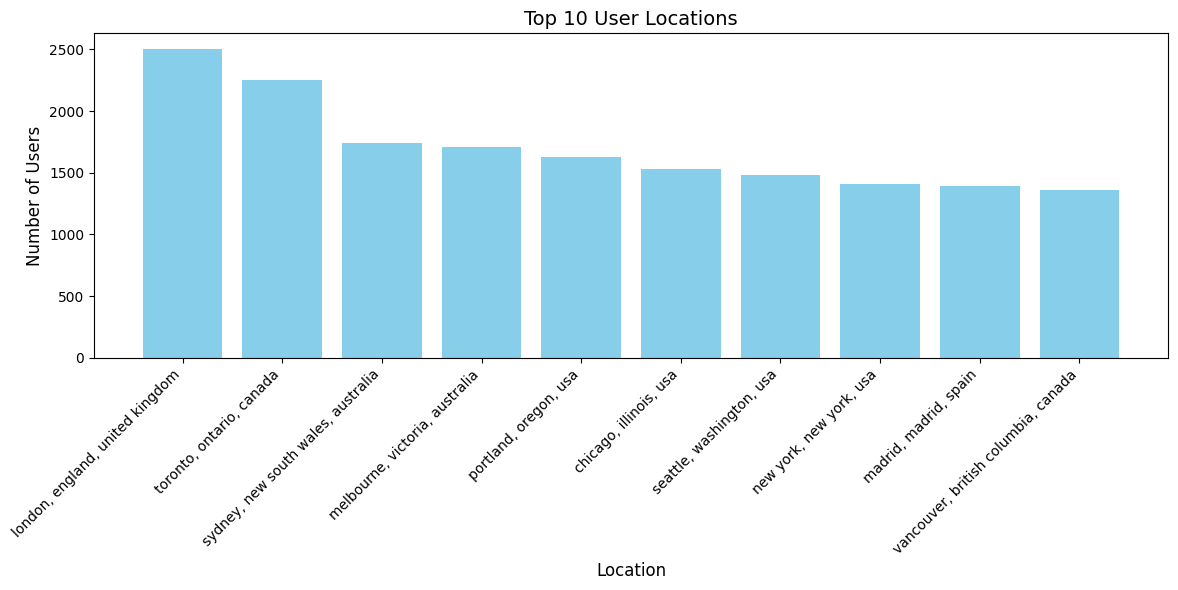

In [29]:
#Bar char for top 10 user location
location_counts = Users['Location'].value_counts()
top_locations = location_counts.head(10)
locations = top_locations.index.tolist()
counts = top_locations.values.tolist()

plt.figure(figsize=(12, 6))
plt.bar(locations, counts, color='skyblue')
plt.xlabel("Location", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.title("Top 10 User Locations", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

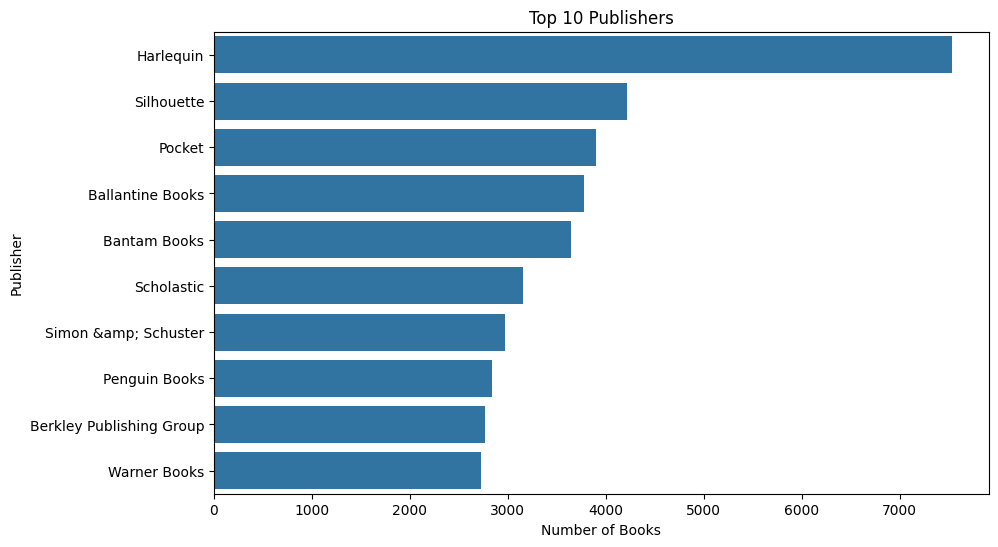

In [30]:
# Top 10 Publishers with the most books
top_publishers = Books['Publisher'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index)
plt.xlabel("Number of Books")
plt.ylabel("Publisher")
plt.title("Top 10 Publishers")
plt.show()

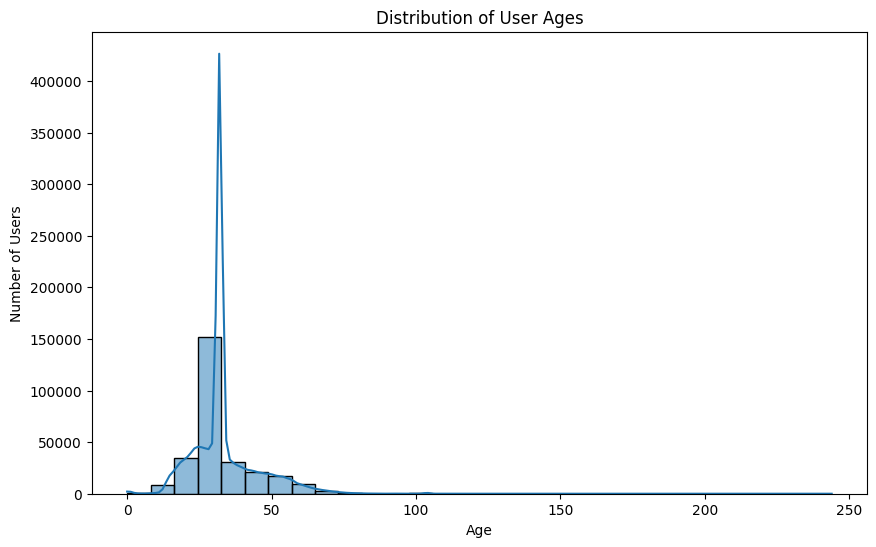

In [31]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(Users['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Distribution of User Ages')
plt.show()

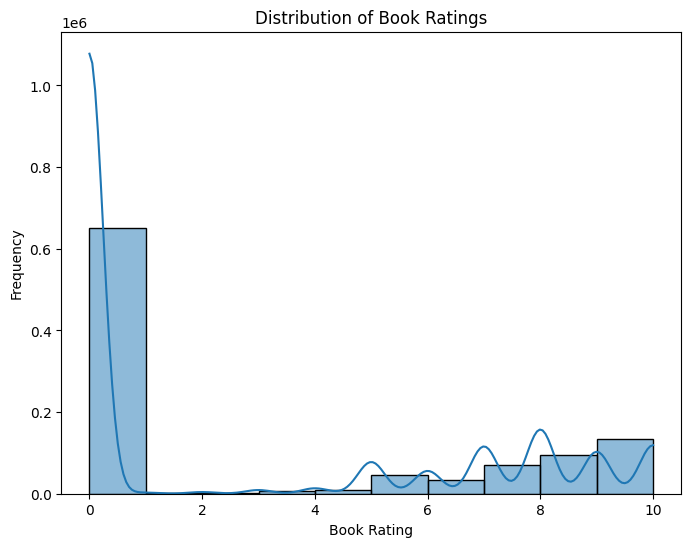

In [32]:
# Distribution of Book Ratings
plt.figure(figsize=(8, 6))
sns.histplot(Ratings['Book-Rating'], bins=10, kde=True)
plt.xlabel("Book Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Book Ratings")
plt.show()

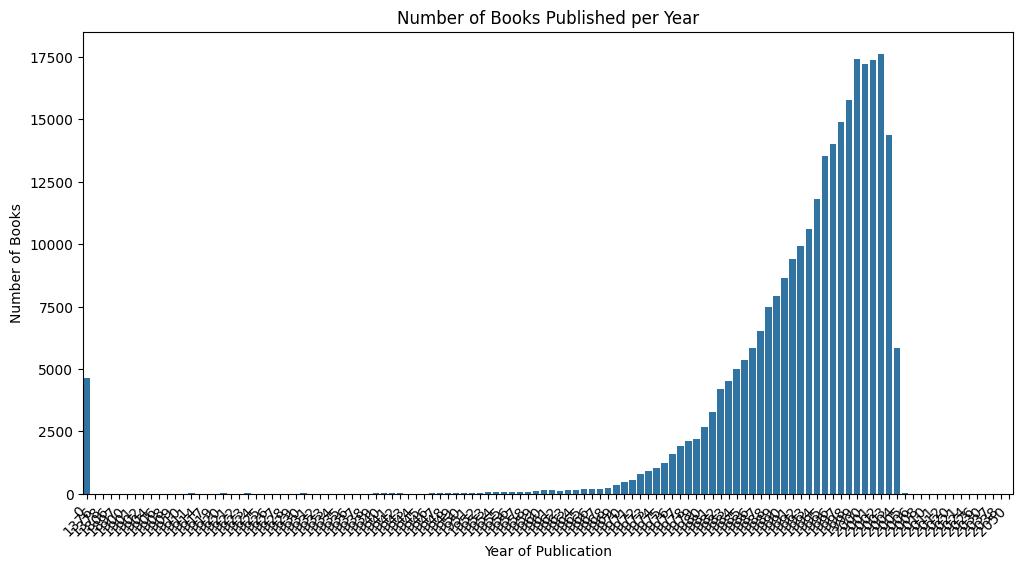

In [33]:
# Number of Books Published per Year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year-Of-Publication', data=Books)
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books")
plt.title("Number of Books Published per Year")
plt.xticks(rotation=45, ha="right")
plt.show()

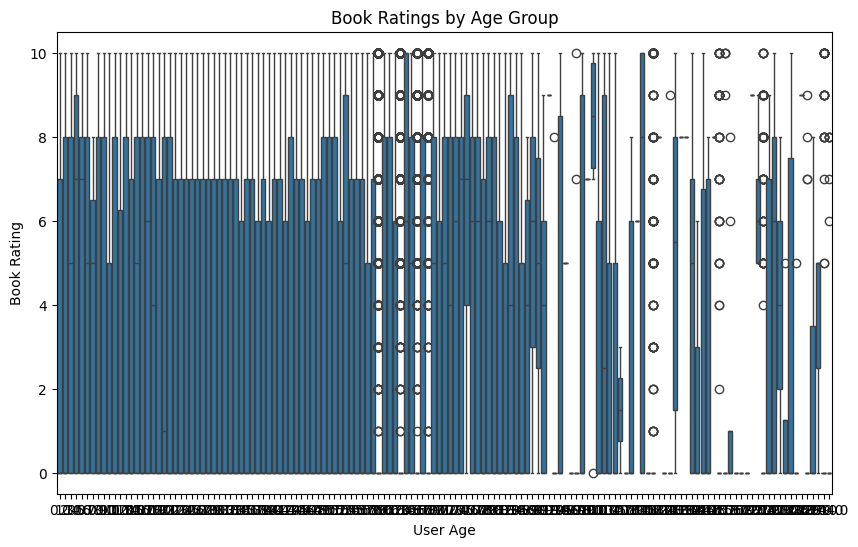

In [34]:
# Box plot of Book Ratings by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Book-Rating', data=pd.merge(Users, Ratings, on='User-ID', how='inner'))
plt.xlabel('User Age')
plt.ylabel('Book Rating')
plt.title('Book Ratings by Age Group')
plt.show()

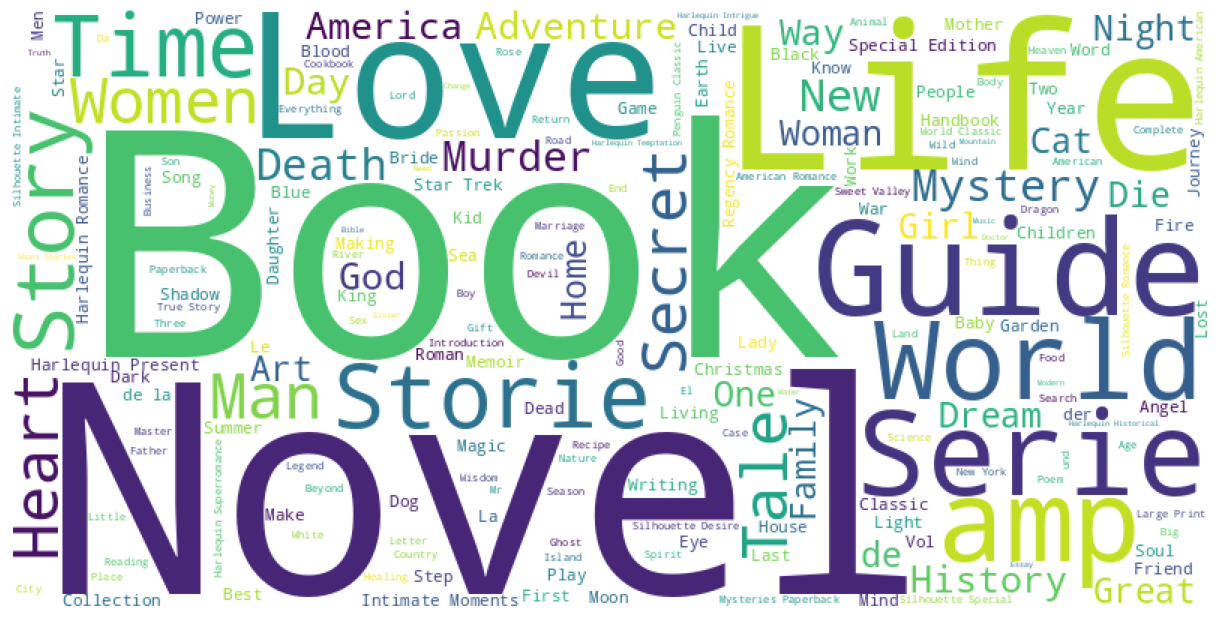

In [35]:
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'Books' DataFrame is available from the previous code

text = " ".join(str(title) for title in Books['Book-Title'])
stopwords = set(STOPWORDS)
stopwords.update(["unknown", "the", "a", "of", "in", "to", "and"]) # Add more common words here
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(12, 6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#Model Building

Model Building

In [36]:
import pandas as pd
# Merge the datasets
ratings_with_books = pd.merge(Ratings, Books, on='ISBN', how='inner')
book_ratings = pd.merge(ratings_with_books, Users, on='User-ID', how='inner')

In [37]:
# Feature Engineering
book_ratings['combined_rating_info'] = book_ratings['Book-Rating'] * book_ratings['Book-Rating']

In [38]:
# Prepare the data for the model
# Select relevant features and target variable
features = ['Book-Rating', 'Age', 'combined_rating_info'] # Example features - add or change as needed
target = 'Book-Rating' # Target variable - adjust if different
X = book_ratings[features]
y = book_ratings[target]

In [39]:
# Handle Missing Values (If any) - Replace with appropriate imputation methods
# Example using mean imputation (consider more sophisticated methods if needed)
for col in X.columns:
    if X[col].isnull().any():
        # Convert the column to numeric if it contains strings
        X[col] = pd.to_numeric(X[col], errors='coerce')  # 'coerce' will replace non-numeric values with NaN
        X[col].fillna(X[col].mean(), inplace=True)

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

#
Random Forest Classifier

Mean Squared Error: 0.0
R-squared: 1.0
Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    118092
         1.0       1.00      1.00      1.00       285
         2.0       1.00      1.00      1.00       406
         3.0       1.00      1.00      1.00       944
         4.0       1.00      1.00      1.00      1383
         5.0       1.00      1.00      1.00      8205
         6.0       1.00      1.00      1.00      5722
         7.0       1.00      1.00      1.00     12173
         8.0       1.00      1.00      1.00     16755
         9.0       1.00      1.00      1.00     11198
        10.0       1.00      1.00      1.00     13050

    accuracy                           1.00    188213
   macro avg       1.00      1.00      1.00    188213
weighted avg       1.00      1.00      1.00    188213



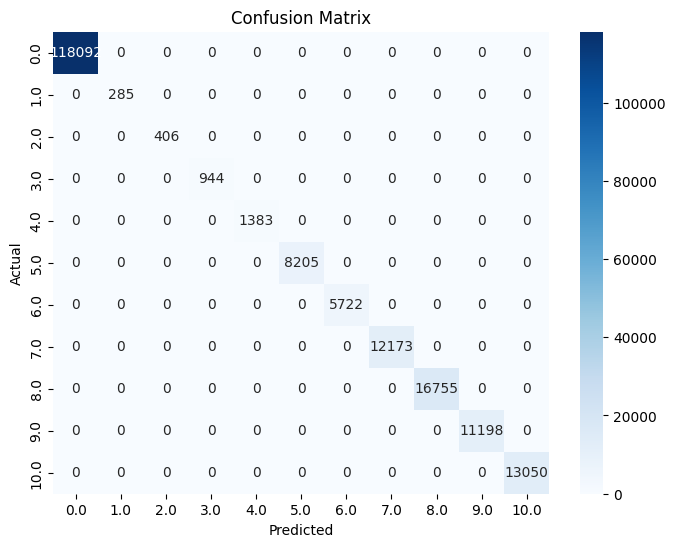

In [41]:

# Model Selection (Example: Random Forest)
from sklearn.ensemble import RandomForestRegressor #Example mode
from sklearn.metrics import confusion_matrix

model = RandomForestRegressor(random_state=42) # Initialize your model

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Calculate accuracy
y_pred_class = np.round(y_pred).astype(int) # Round probabilities to 0 or 1
accuracy = accuracy_score(y_test, y_pred_class)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_class))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#Logical Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9995643233995526
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    118092
         1.0       0.95      0.85      0.89       285
         2.0       0.89      0.94      0.91       406
         3.0       0.98      0.99      0.99       944
         4.0       1.00      1.00      1.00      1383
         5.0       1.00      1.00      1.00      8205
         6.0       1.00      1.00      1.00      5722
         7.0       1.00      1.00      1.00     12173
         8.0       1.00      1.00      1.00     16755
         9.0       1.00      1.00      1.00     11198
        10.0       1.00      1.00      1.00     13050

    accuracy                           1.00    188213
   macro avg       0.98      0.98      0.98    188213
weighted avg       1.00      1.00      1.00    188213



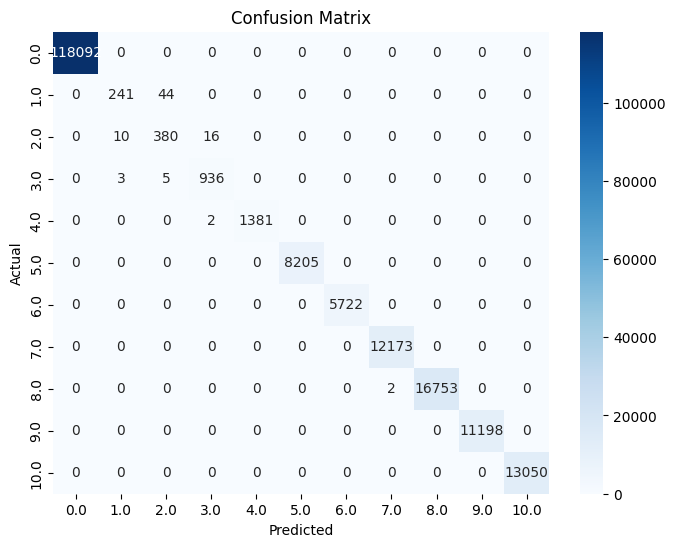

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# ... (Your existing code) ...

# Model Selection (Logistic Regression)
model = LogisticRegression(random_state=42, max_iter=1000) # Initialize your model, increase max_iter if needed

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decison Tree Classifire

Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    118092
         1.0       1.00      1.00      1.00       285
         2.0       1.00      1.00      1.00       406
         3.0       1.00      1.00      1.00       944
         4.0       1.00      1.00      1.00      1383
         5.0       1.00      1.00      1.00      8205
         6.0       1.00      1.00      1.00      5722
         7.0       1.00      1.00      1.00     12173
         8.0       1.00      1.00      1.00     16755
         9.0       1.00      1.00      1.00     11198
        10.0       1.00      1.00      1.00     13050

    accuracy                           1.00    188213
   macro avg       1.00      1.00      1.00    188213
weighted avg       1.00      1.00      1.00    188213



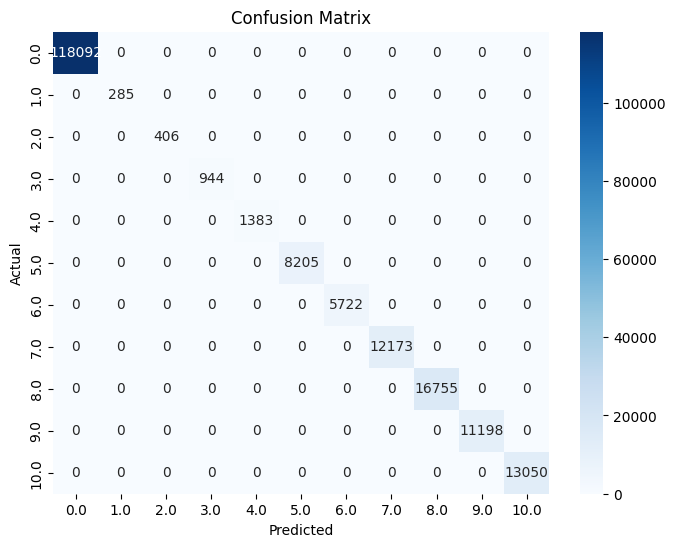

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# ... (Your existing code) ...

# Model Selection (Decision Tree Classifier)
model = DecisionTreeClassifier(random_state=42)  # Initialize your model

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Accuracy (KNN): 0.9999521818365362
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    118092
         1.0       1.00      0.99      0.99       285
         2.0       1.00      0.99      1.00       406
         3.0       1.00      1.00      1.00       944
         4.0       1.00      1.00      1.00      1383
         5.0       1.00      1.00      1.00      8205
         6.0       1.00      1.00      1.00      5722
         7.0       1.00      1.00      1.00     12173
         8.0       1.00      1.00      1.00     16755
         9.0       1.00      1.00      1.00     11198
        10.0       1.00      1.00      1.00     13050

    accuracy                           1.00    188213
   macro avg       1.00      1.00      1.00    188213
weighted avg       1.00      1.00      1.00    188213



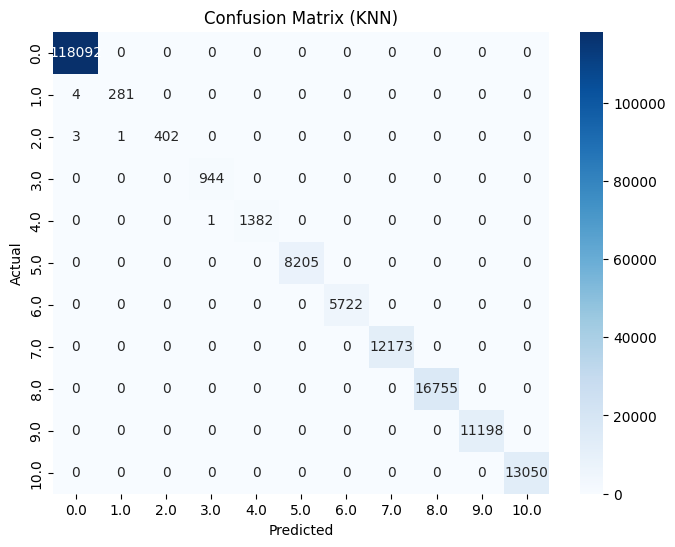

In [45]:
from sklearn.neighbors import KNeighborsClassifier
# Model Selection (KNN)
model = KNeighborsClassifier()  # Initialize your model

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (KNN): {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()


Accuracy (SVC): 0.999978747482905
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    118092
         1.0       1.00      0.99      1.00       285
         2.0       1.00      1.00      1.00       406
         3.0       1.00      1.00      1.00       944
         4.0       1.00      1.00      1.00      1383
         5.0       1.00      1.00      1.00      8205
         6.0       1.00      1.00      1.00      5722
         7.0       1.00      1.00      1.00     12173
         8.0       1.00      1.00      1.00     16755
         9.0       1.00      1.00      1.00     11198
        10.0       1.00      1.00      1.00     13050

    accuracy                           1.00    188213
   macro avg       1.00      1.00      1.00    188213
weighted avg       1.00      1.00      1.00    188213



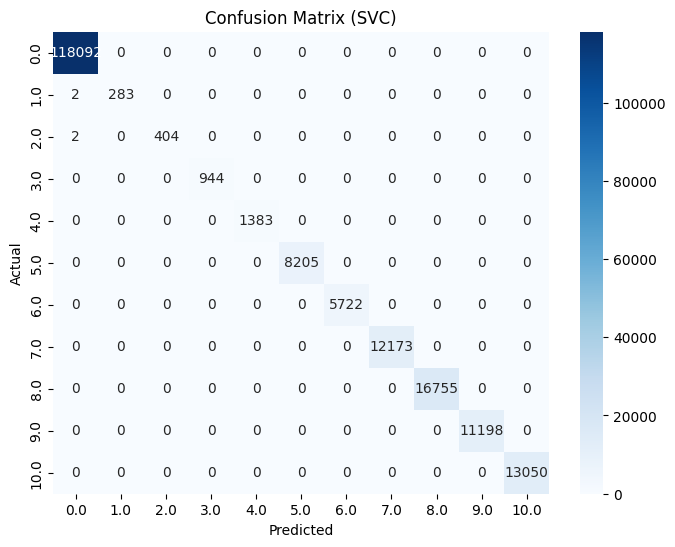

In [46]:
from sklearn.svm import SVC

model = SVC(random_state=42)  # Initialize your model

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (SVC): {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVC)')
plt.show()
